# CLASSIFICAÇÃO

## DEVEMOS CONSTRUIR A NOSSA BASE

## 1 - MÉTRICAS

In [60]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def acuracia(y_test, y_pred):
    valor = accuracy_score(y_test, y_pred)
    return valor
    
def erro(y_test, y_pred):
    valor = 1 - accuracy_score(y_test, y_pred)
    return valor
    
def recall(y_test, y_pred):
    valor = recall_score(y_test, y_pred)
    return valor
    
def especificidade(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    valor = tn / (tn + fp)
    return valor
    
def precisao(y_test, y_pred):
    valor = precision_score(y_test, y_pred)
    return valor
    
def f1_score(y_test, y_pred):
    numerador = 2 * precisao(y_test, y_pred) * recall(y_test, y_pred)
    denominador = precisao(y_test, y_pred) + recall(y_test, y_pred)
    valor = numerador / denominador
    return valor
    
def auc_roc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"Curva ROC (Área = {area:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva Característica de Operação do Receptor')
    plt.legend(loc="lower right")
    plt.show()
    
def matriz_da_confusao(classes, y_test, y_pred):
    matriz = 100 * confusion_matrix(y_test, y_pred, normalize='pred')
    np.round(matriz, 2)
    plt.figure(figsize=(10,7))
    sns.heatmap(matriz, annot=True, fmt=".2f", cmap="Blues", cbar=False, xticklabels=np.unique(classes), yticklabels=np.unique(classes))
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz da Confusão (em %)')
    plt.show()

def mar(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    valor = fn / (fn + tp)
    return valor

def far(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    valor = fp / (fp + tn)
    return valor
    
def ks(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor = max(tpr - fpr)
    return valor
    
def metricas(classes, y_test, y_pred, prob):
    valores = f"""
    Acurácia: {acuracia(y_test, y_pred):.8f}
    Erro: {erro(y_test, y_pred):.8f}
    Recall: {recall(y_test, y_pred):.8f}
    Especificidade: {especificidade(y_test, y_pred):.8f}
    Precisão: {precisao(y_test, y_pred):.8f}
    F1-Score: {f1_score(y_test, y_pred):.8f}
    Miss Alarm Rate: {mar(y_test, y_pred):.8f}
    False Alarm Rate: {far(y_test, y_pred):.8f}
    KS: {ks(y_test, prob):.8f}
    """
    print(valores)
    auc_roc(y_test, prob)
    matriz_da_confusao(classes, y_test, y_pred)

## 2 - TRATAR OS DADOS

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("cs-training.csv", index_col=False)

df.fillna(0, inplace=True)

colunas = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

x = df[colunas].values
y = df["SeriousDlqin2yrs"].values

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

## 3 - KNN


    Acurácia: 0.93280000
    Erro: 0.06720000
    Recall: 0.00396040
    Especificidade: 0.99985704
    Precisão: 0.66666667
    F1-Score: 0.00787402
    Miss Alarm Rate: 0.99603960
    False Alarm Rate: 0.00014296
    KS: 0.21770666
    


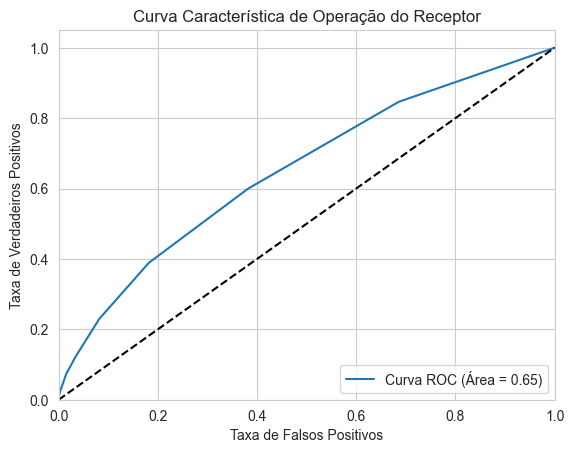

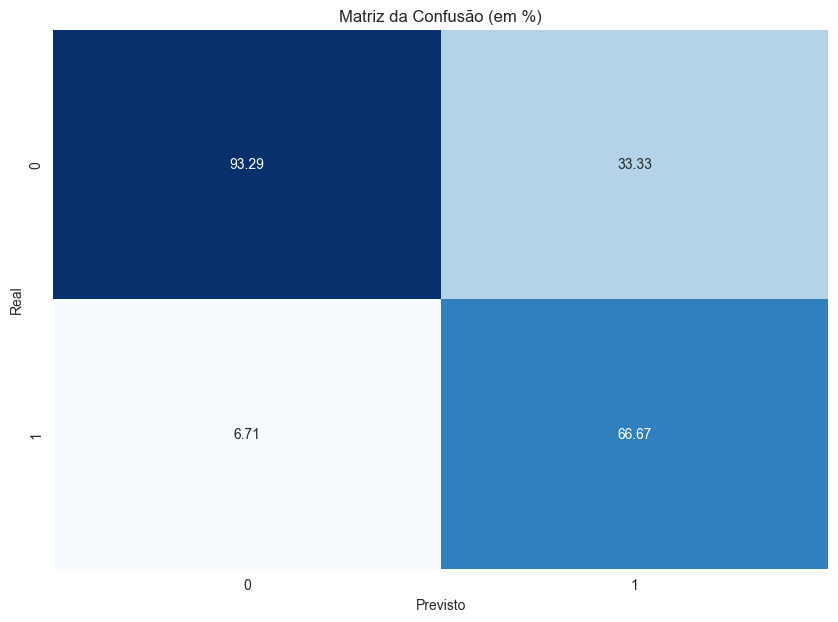

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30, weights='uniform', leaf_size=30, p=1, algorithm='auto')

knn.fit(x_treino, y_treino)

previsto = knn.predict(x_teste)
previsto_prob = knn.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 4 - REDES NEURAIS

Iteration 1, loss = 0.24551209
Iteration 2, loss = 0.24295328
Iteration 3, loss = 0.24323090
Iteration 4, loss = 0.24270647
Iteration 5, loss = 0.24292835
Iteration 6, loss = 0.24304218
Iteration 7, loss = 0.24234140
Iteration 8, loss = 0.24280283
Iteration 9, loss = 0.24182619
Iteration 10, loss = 0.24206098
Iteration 11, loss = 0.24227004
Iteration 12, loss = 0.24193399
Iteration 13, loss = 0.24205098
Iteration 14, loss = 0.24237226
Iteration 15, loss = 0.24220995
Iteration 16, loss = 0.24266221
Iteration 17, loss = 0.24258495
Iteration 18, loss = 0.24284339
Iteration 19, loss = 0.24193637
Iteration 20, loss = 0.24205138
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

    Acurácia: 0.93253333
    Erro: 0.06746667
    Recall: 0.00561056
    Especificidade: 0.99945199
    Precisão: 0.42500000
    F1-Score: 0.01107492
    Miss Alarm Rate: 0.99438944
    False Alarm Rate: 0.00054801
    KS: 0.06429416
    


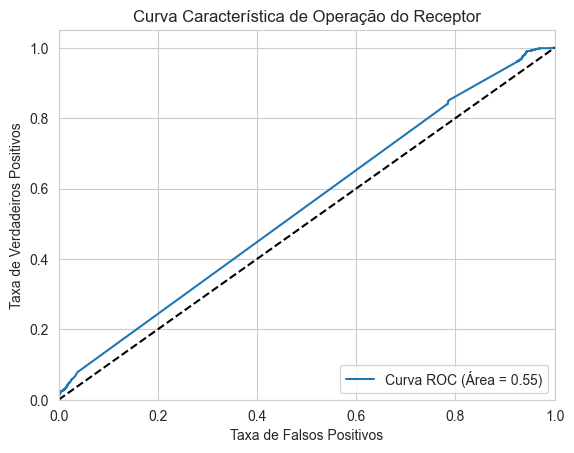

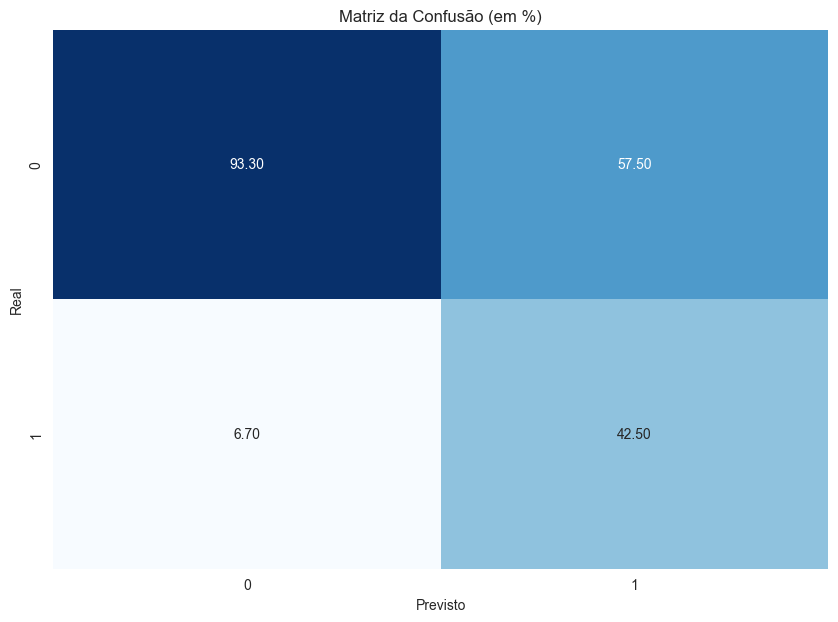

In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="adam", alpha=0.0001, hidden_layer_sizes=(40,), random_state=1, learning_rate='constant', learning_rate_init=0.01, max_iter=100, activation="logistic", tol=0.0001, verbose=True)

mlp.fit(x_treino, y_treino)
previsto = mlp.predict(x_teste)
previsto_prob = mlp.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

# 5 - SVM


    Acurácia: 0.93266667
    Erro: 0.06733333
    Recall: 0.00000000
    Especificidade: 1.00000000
    Precisão: 0.00000000
    F1-Score: nan
    Miss Alarm Rate: 1.00000000
    False Alarm Rate: 0.00000000
    KS: 0.19848760
    


C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\AppD

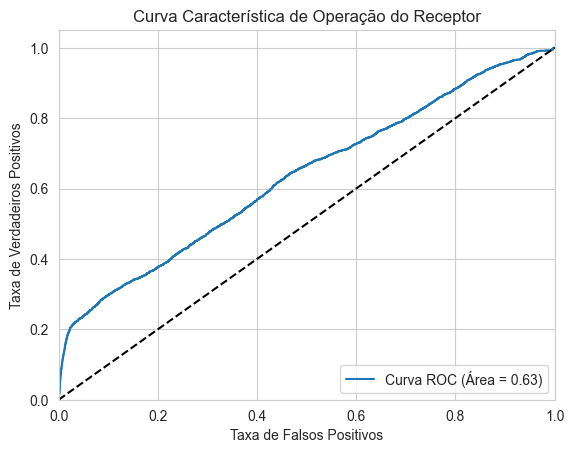

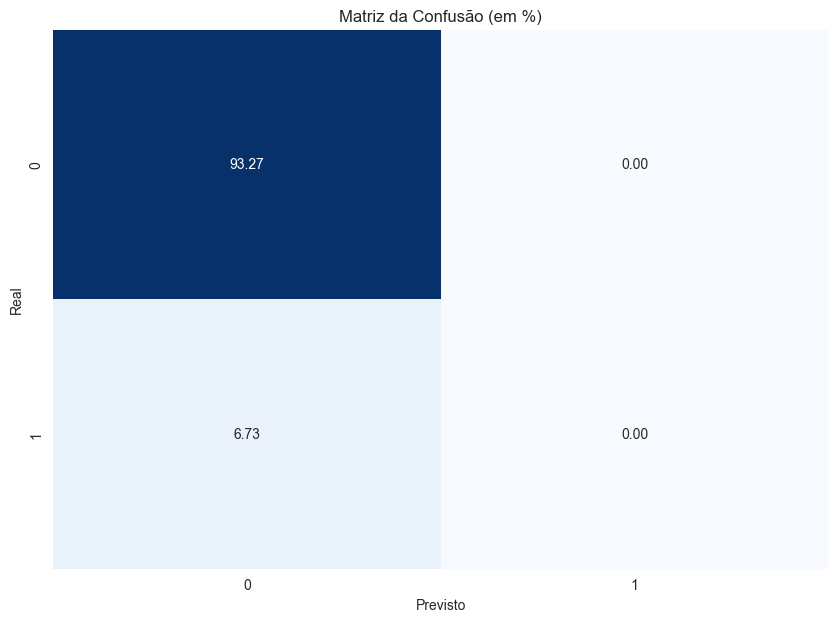

In [64]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(x_treino, y_treino)
previsto = svm.predict(x_teste)
previsto_prob = svm.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

# 6 - DECISION TREE


    Acurácia: 0.89784444
    Erro: 0.10215556
    Recall: 0.27755776
    Especificidade: 0.94262569
    Precisão: 0.25884888
    F1-Score: 0.26787705
    Miss Alarm Rate: 0.72244224
    False Alarm Rate: 0.05737431
    KS: 0.22114617
    


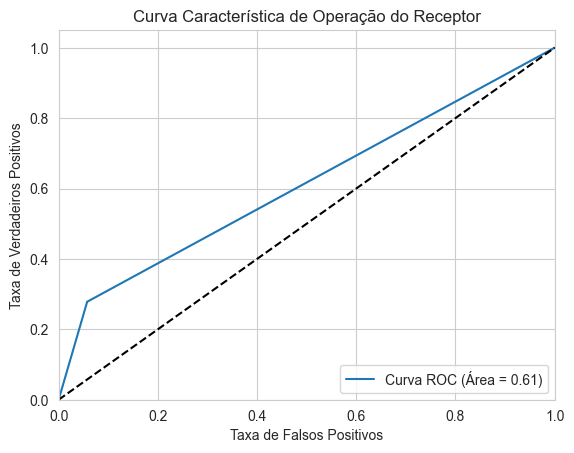

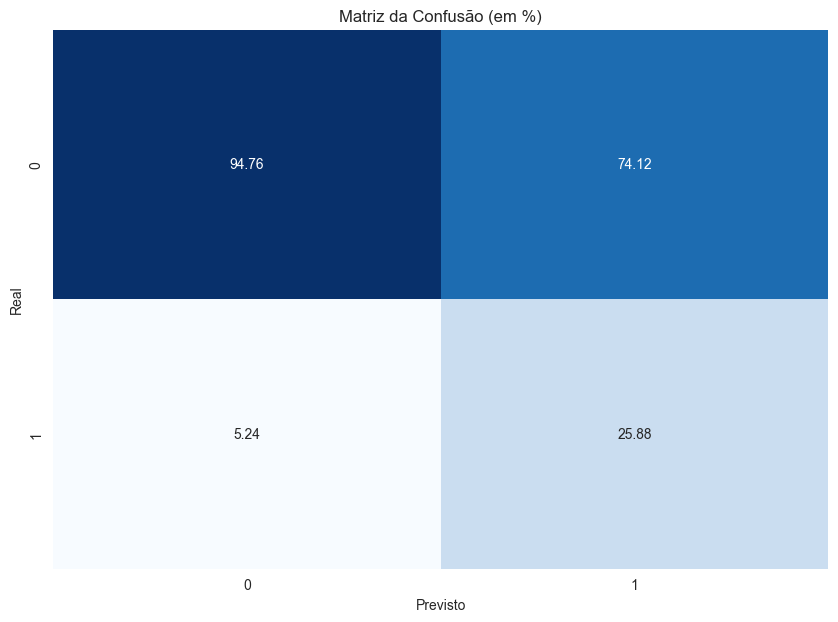

In [65]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_treino, y_treino)
previsto = tree.predict(x_teste)
previsto_prob = tree.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 7 - RANDOM FLOREST


    Acurácia: 0.93546667
    Erro: 0.06453333
    Recall: 0.10726073
    Especificidade: 0.99525852
    Precisão: 0.62022901
    F1-Score: 0.18289252
    Miss Alarm Rate: 0.89273927
    False Alarm Rate: 0.00474148
    KS: 0.54634475
    


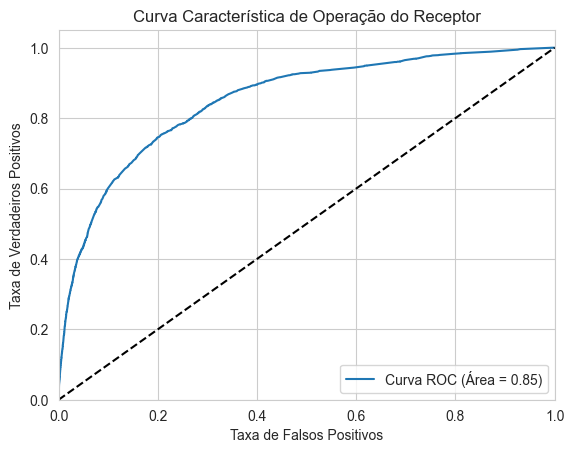

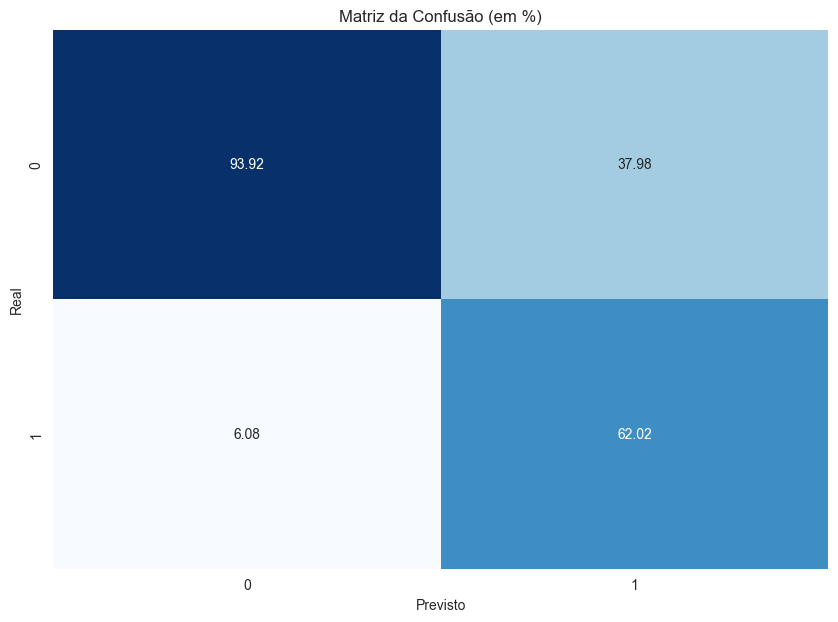

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1)

rf.fit(x_treino, y_treino)
previsto = rf.predict(x_teste)
previsto_prob = rf.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 8 - GRADIENT BOOSTING


    Acurácia: 0.92253333
    Erro: 0.07746667
    Recall: 0.33531353
    Especificidade: 0.96492733
    Precisão: 0.40836013
    F1-Score: 0.36824937
    Miss Alarm Rate: 0.66468647
    False Alarm Rate: 0.03507267
    KS: 0.30024086
    


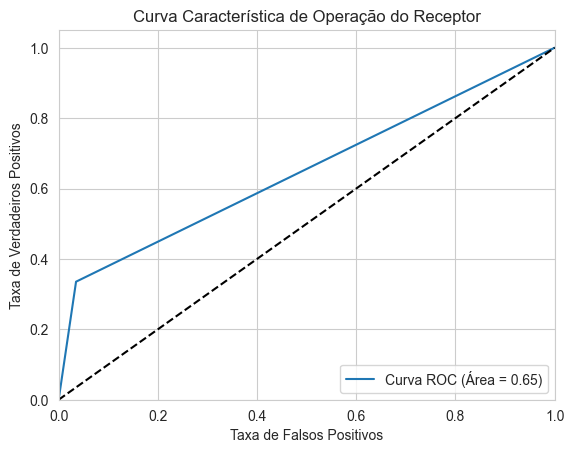

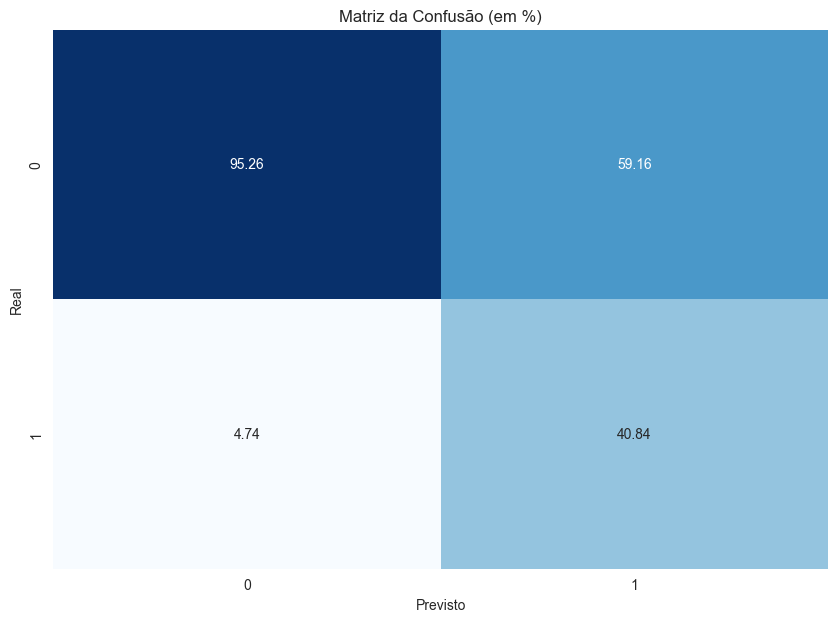

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(x_treino, y_treino)
previsto = gb.predict(x_teste)
previsto_prob = gb.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 9 - NAIVE BAYES


    Acurácia: 0.93204444
    Erro: 0.06795556
    Recall: 0.02211221
    Especificidade: 0.99773648
    Precisão: 0.41358025
    F1-Score: 0.04197995
    Miss Alarm Rate: 0.97788779
    False Alarm Rate: 0.00226352
    KS: 0.30085139
    


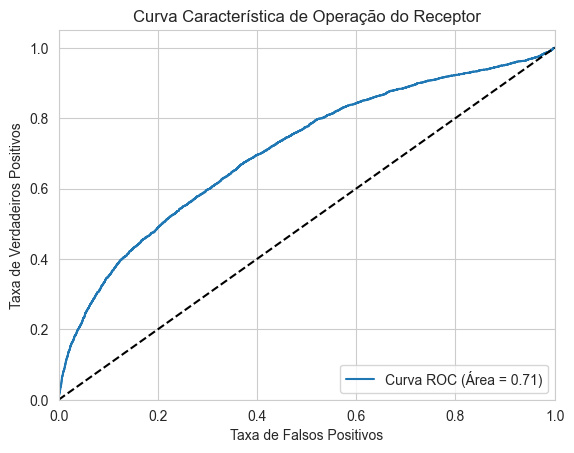

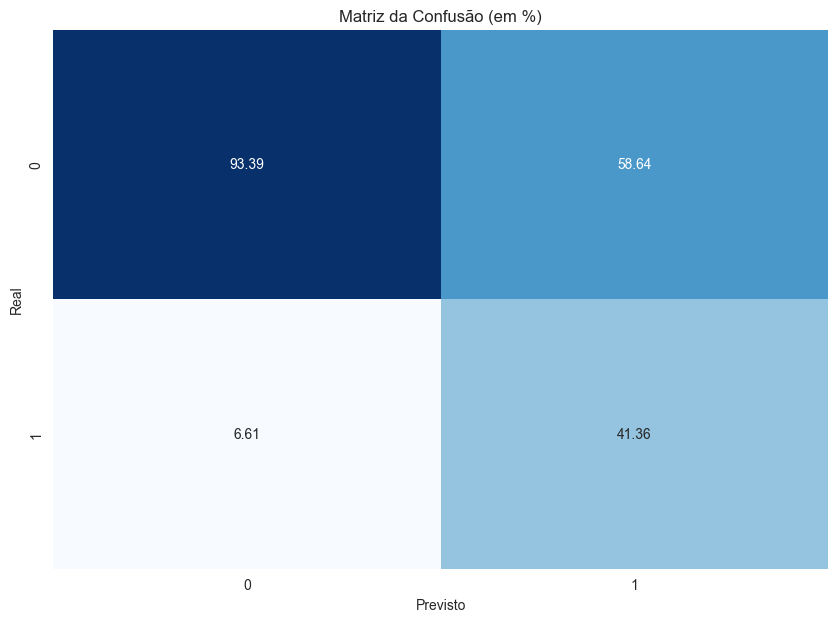

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_treino, y_treino)
previsto = nb.predict(x_teste)
previsto_prob = nb.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 10 - ADABOOST

C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



    Acurácia: 0.93422222
    Erro: 0.06577778
    Recall: 0.20693069
    Especificidade: 0.98672862
    Precisão: 0.52956081
    F1-Score: 0.29757950
    Miss Alarm Rate: 0.79306931
    False Alarm Rate: 0.01327138
    KS: 0.55666259
    


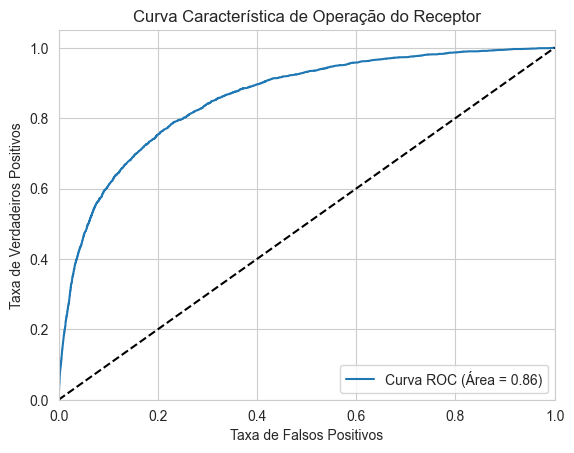

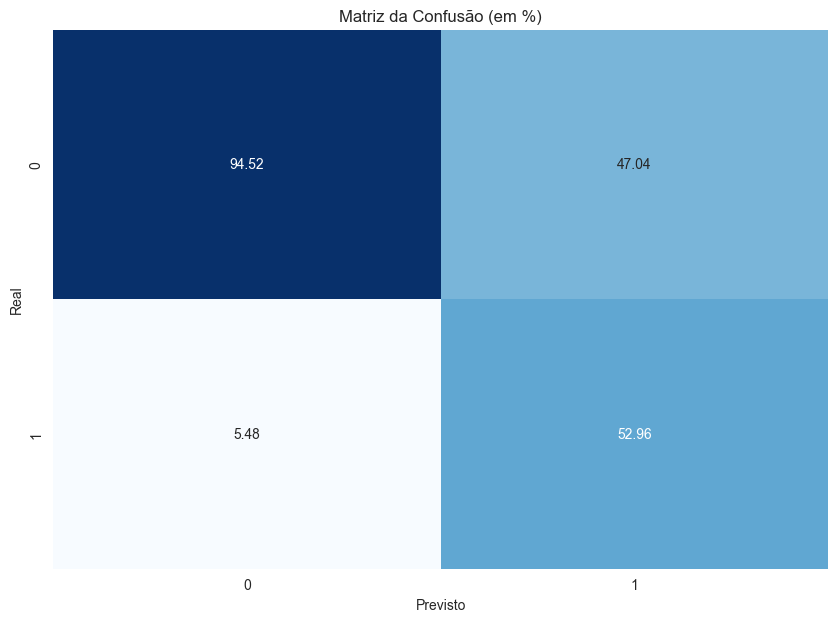

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(x_treino, y_treino)
previsto = ab.predict(x_teste)
previsto_prob = ab.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 11 - QUADRATIC DISCRIMINANT ANALYSIS


    Acurácia: 0.90751111
    Erro: 0.09248889
    Recall: 0.41353135
    Especificidade: 0.94317370
    Precisão: 0.34442001
    F1-Score: 0.37582484
    Miss Alarm Rate: 0.58646865
    False Alarm Rate: 0.05682630
    KS: 0.48483995
    


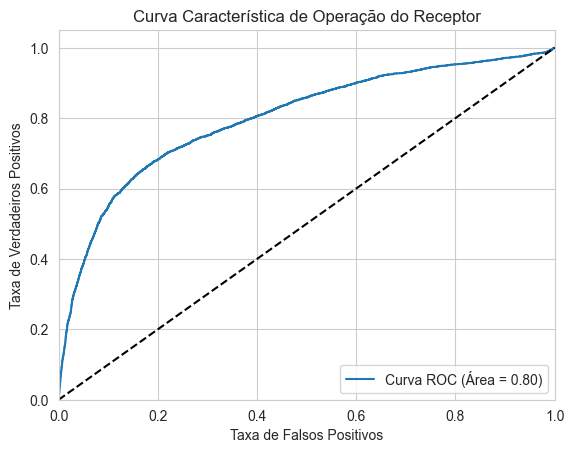

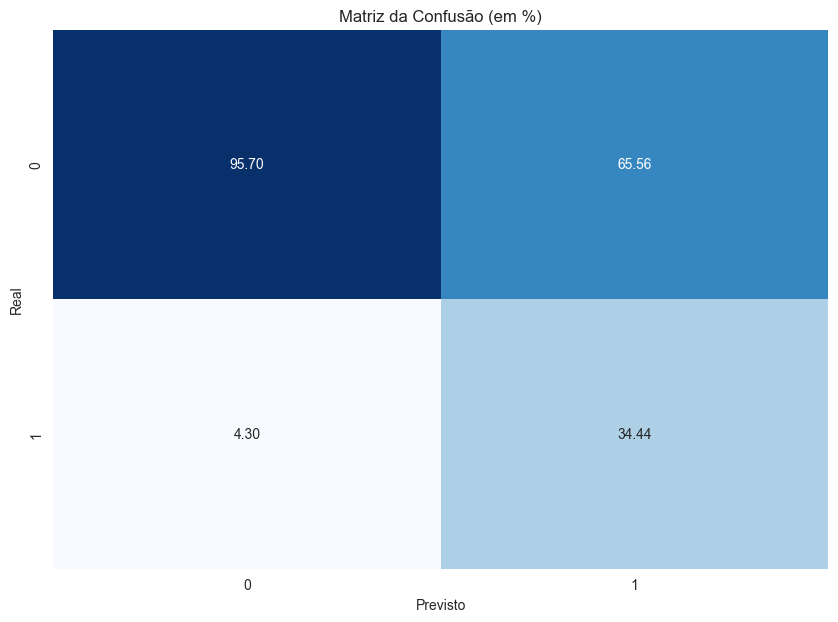

In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_treino, y_treino)
previsto = qda.predict(x_teste)
previsto_prob = qda.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)